# BUSINESS UNDERSTANDING

Tony who has profession as a broker wants to predict apartment price in Victoria based on living area environment and apartment conservation status. Determine **the best model to predict and redefine new conservation variable in 3 level, A = 1A, B = 2A, C = 2B and 3A**.<br>

The step that should be done :
1. Import Dataset: Load the dataset.
2. Exploratory Data Analysis: Create summary of the dataset, with python function. (mean, median, modus, max, min, range)
3. Data Visualization: Create any kind suitable plot of dataset, it will provide a lot of insight into the problem.
4. Variable Selection: Choose the variable and its reason.
5. Modelling: Create models using Regression
6. Accuracy or Error: Calculate the Error using the helper function from the library, from dataset only

# DATA UNDERSTANDING

The steps of this section :<br>
1. Import Library
2. Load Dataset
3. **Exploratory Data Analysis (EDA) of dataset**

### IMPORT LIBRARY

In [55]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings('ignore')

### LOAD DATASET

In [56]:
df = pd.read_csv('victoria.csv')

### EXPLORATORY DATA ANALYSIS

In [57]:
df.head()

,row.labels,totalprice,area,zone,category,age,floor,rooms,out,conservation,toilets,garage,elevator,streetcategory,heating,tras
0,1,228000,7530999756,Z45,4B,33,3,5,E100,2B,1,0,1,S3,3A,0
1,2,409000,1006500015,Z31,3B,5,7,5,E50,1A,2,1,1,S5,4A,1
2,3,200000,8887000275,Z52,3A,14,8,5,E50,1A,2,0,1,S2,3A,0
3,4,180000,6261000061,Z62,4A,41,3,4,E50,2A,1,0,0,S3,1A,0
4,5,443600,1461499939,Z31,3A,22,6,7,E100,1A,2,0,1,S4,4A,1


##### The dimension of dataset (row,column)

In [58]:
df.shape

(218, 16)

##### The summary of dataset

In [59]:
df.describe()

,row.labels,age,floor,rooms,toilets,garage,elevator,tras
count,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000
mean,109.500000,19.899083,4.440367,4.853211,1.467890,0.243119,0.798165,0.807339
std,63.075352,14.595590,2.126988,0.634285,0.500116,0.450881,0.402293,0.406787
min,1.000000,1.000000,1.000000,3.000000,1.000000,0.000000,0.000000,0.000000
25%,55.250000,11.000000,3.000000,5.000000,1.000000,0.000000,1.000000,1.000000
50%,109.500000,16.000000,4.000000,5.000000,1.000000,0.000000,1.000000,1.000000
75%,163.750000,24.000000,5.000000,5.000000,2.000000,0.000000,1.000000,1.000000
max,218.000000,118.000000,12.000000,7.000000,2.000000,2.000000,1.000000,2.000000


##### The information of dataset

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218 entries, 0 to 217
Data columns (total 16 columns):
row.labels        218 non-null int64
totalprice        218 non-null object
area              218 non-null object
zone              218 non-null object
category          218 non-null object
age               218 non-null int64
floor             218 non-null int64
rooms             218 non-null int64
out               218 non-null object
conservation      218 non-null object
toilets           218 non-null int64
garage            218 non-null int64
elevator          218 non-null int64
streetcategory    218 non-null object
heating           218 non-null object
tras              218 non-null int64
dtypes: int64(8), object(8)
memory usage: 27.3+ KB


Dataset have 218 rows and 16 columns with 8 integer data type and 8 categorical data type.

# DATA PREPARATION
In this section, I will prepare the data by dropping unused columns, handling the missing values, visualizing each data to see the correlation, handling outlier, and choosing the feature importance.

### DROP UNUSED COLUMNS

In [61]:
# row labels represents the number of row, so I will drop it because it won't give any insight
df=df.drop(columns=['row.labels'])
df.head()

,totalprice,area,zone,category,age,floor,rooms,out,conservation,toilets,garage,elevator,streetcategory,heating,tras
0,228000,7530999756,Z45,4B,33,3,5,E100,2B,1,0,1,S3,3A,0
1,409000,1006500015,Z31,3B,5,7,5,E50,1A,2,1,1,S5,4A,1
2,200000,8887000275,Z52,3A,14,8,5,E50,1A,2,0,1,S2,3A,0
3,180000,6261000061,Z62,4A,41,3,4,E50,2A,1,0,0,S3,1A,0
4,443600,1461499939,Z31,3A,22,6,7,E100,1A,2,0,1,S4,4A,1


### MISSING VALUES HANDLING

In [62]:
# count_missing = data.isnull().sum().sort_values(ascending = False)
percentage_missing=round(df.isnull().sum()/len(df)*100,2).sort_values(ascending = False)
print(percentage_missing)

tras              0.0
heating           0.0
streetcategory    0.0
elevator          0.0
garage            0.0
toilets           0.0
conservation      0.0
out               0.0
rooms             0.0
floor             0.0
age               0.0
category          0.0
zone              0.0
area              0.0
totalprice        0.0
dtype: float64


All columns have no missing values.

### DATA CLEANSING
In this section, I will change data type of total price and area into numeric, so I can use them to create visualization.

In [63]:
#Data Cleansing
df['totalprice'] = df['totalprice'].replace(r'[,]','', regex=True)
df['area'] = df['area'].replace(r'[,]','', regex=True)

In [64]:
#Change data type
df['totalprice'] = pd.to_numeric(df['totalprice'])
df['area'] = pd.to_numeric(df['area'])

# DATA VISUALIZATION
In this section, I will plot the dataset into graph using univariate and bivariate analysis.

### Univariate Analysis
Univariate analysis will visualize one feature into graph.

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218 entries, 0 to 217
Data columns (total 15 columns):
totalprice        218 non-null int64
area              218 non-null int64
zone              218 non-null object
category          218 non-null object
age               218 non-null int64
floor             218 non-null int64
rooms             218 non-null int64
out               218 non-null object
conservation      218 non-null object
toilets           218 non-null int64
garage            218 non-null int64
elevator          218 non-null int64
streetcategory    218 non-null object
heating           218 non-null object
tras              218 non-null int64
dtypes: int64(9), object(6)
memory usage: 25.6+ KB


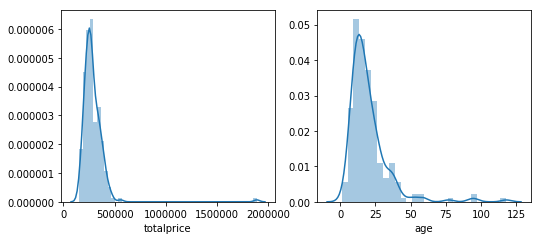

In [66]:
#Visualization for numeric fields
f=plt.figure(figsize=(13,12))
f.add_subplot(3,3,1)
sns.distplot(df['totalprice'])
f.add_subplot(3,3,2)
sns.distplot(df['age'])

From the above, we can know that :
- Total price is centralized around 250000
- The age of building is centralized around 20

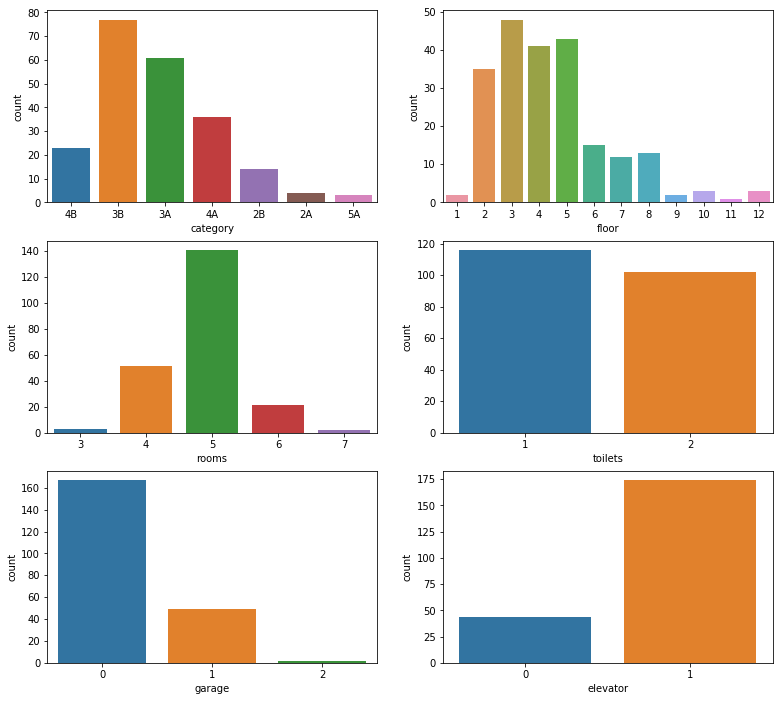

In [67]:
# visualization for categoric variable

f=plt.figure(figsize=(13,12))
f.add_subplot(3,2,1)
sns.countplot(df['category'],orient = "h")
f.add_subplot(3,2,2)
sns.countplot(df['floor'],orient = "h")
f.add_subplot(3,2,3)
sns.countplot(df['rooms'],orient = "h")
f.add_subplot(3,2,4)
sns.countplot(df['toilets'],orient = "h")
f.add_subplot(3,2,5)
sns.countplot(df['garage'],orient = "h")
f.add_subplot(3,2,6)
sns.countplot(df['elevator'],orient = "h")

From the above, we can know that :
- The apartment has 7 type of categories : 2A, 2B, 3A, 3B, 4A, 4B, and 5B category. And most of the apartment is 3B category.
- The apartment has 12 type of floors : from 1 to 12 floors.
- The apartment has 5 type of rooms : has 3 rooms - 7 rooms. And most of the apartment has 5 rooms.
- The apartment has 2 type of toilets : has 1 toilet and 2 toilets. And most of the apartment has 1 toilet.
- The apartment has 3 type of garages : has 0 garage - 2 garages. And most of the apartment has no garage.
- The apartment has 2 type of elevators : has 0 elevator and 1 elevator. And most of the apartment has 1 elevator.

### Bivariate Analysis
Bivariate analysis will visualize more than one feature into graph.

In [68]:
#Correlation of each feature
df.corr().style.background_gradient().set_precision(2)

,totalprice,area,age,floor,rooms,toilets,garage,elevator,tras
totalprice,1,-0.19,-0.075,0.0031,0.2,0.31,0.25,0.15,0.17
area,-0.19,1,-0.14,-0.018,-0.28,-0.28,-0.18,-3.2e-05,0.0038
age,-0.075,-0.14,1,-0.081,-0.083,-0.28,-0.21,-0.41,-0.27
floor,0.0031,-0.018,-0.081,1,0.13,0.1,-0.03,0.2,-0.12
rooms,0.2,-0.28,-0.083,0.13,1,0.42,0.21,0.35,0.033
toilets,0.31,-0.28,-0.28,0.1,0.42,1,0.45,0.45,0.22
garage,0.25,-0.18,-0.21,-0.03,0.21,0.45,1,0.27,0.16
elevator,0.15,-3.2e-05,-0.41,0.2,0.35,0.45,0.27,1,0.21
tras,0.17,0.0038,-0.27,-0.12,0.033,0.22,0.16,0.21,1


From the heatmap above, we can see the correlation between variables :
- totalprice - toilets : 0,31
- totalprice - garage : 0,25
- totalprice - rooms : 0,2

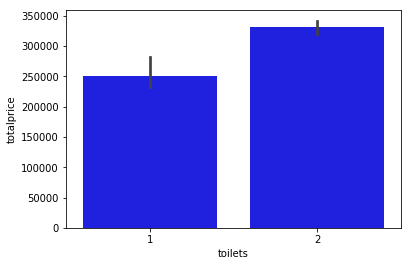

In [69]:
#Bivariate Analysis totalprice - toilets
sns.barplot(data=df, x=df['toilets'], y=df['totalprice'], color='blue')

From the barplot above, we can know that :
- The higher number of toilet that apartment has, the more expensive the price of apartment.

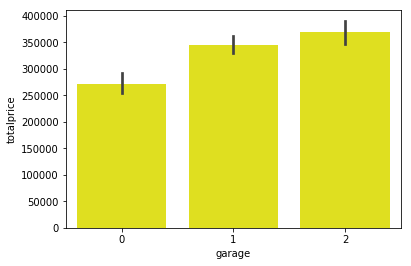

In [70]:
#Bivariate Analysis totalprice - garages
sns.barplot(data=df, x=df['garage'], y=df['totalprice'], color='yellow')

From the barplot above, we can know that :
- The higher number of garage that apartment has, the more expensive the price of apartment.

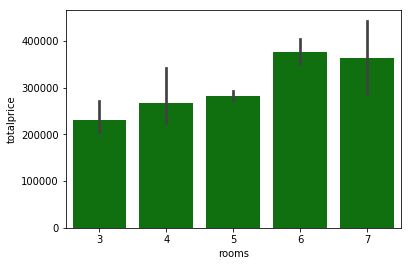

In [71]:
#Bivariate Analysis totalprice - rooms
sns.barplot(data=df, x=df['rooms'], y=df['totalprice'], color='green')

From the barplot above, we can know that :
- The higher number of rooms that apartment has, the more expensive the price of apartment.

# FEATURE SELECTION

- I will choose numeric variable only because machine learning model only available for numeric data type.
- Specially for conservation, I will change the data type into numeric.

In [72]:
# Change conservation data type into numeric
# A = 1A, B = 2A, C = 2B and 3A
dicti = {
    '2B':3,
    '3A':3,
    '2A':2,
    '1A':1
}
df['conservation'] = df['conservation'].replace(dicti)

In [76]:
data = df.copy()

In [77]:
# Drop columns that won't be used
drop = ['zone', 'category', 'out', 'streetcategory', 'heating']
data.drop(columns=drop, inplace=True)

In [78]:
# Create one hot encoding for conservation feature
data['conservation'] = pd.Categorical(data['conservation'])
data = pd.get_dummies(data)

In [79]:
data.head()

,totalprice,area,age,floor,rooms,toilets,garage,elevator,tras,conservation_1,conservation_2,conservation_3
0,228000,7530999756,33,3,5,1,0,1,0,0,0,1
1,409000,1006500015,5,7,5,2,1,1,1,1,0,0
2,200000,8887000275,14,8,5,2,0,1,0,1,0,0
3,180000,6261000061,41,3,4,1,0,0,0,0,1,0
4,443600,1461499939,22,6,7,2,0,1,1,1,0,0


In [138]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218 entries, 0 to 217
Data columns (total 12 columns):
totalprice        218 non-null int64
area              218 non-null int64
age               218 non-null int64
floor             218 non-null int64
rooms             218 non-null int64
toilets           218 non-null int64
garage            218 non-null int64
elevator          218 non-null int64
tras              218 non-null int64
conservation_1    218 non-null uint8
conservation_2    218 non-null uint8
conservation_3    218 non-null uint8
dtypes: int64(9), uint8(3)
memory usage: 16.0 KB


# MODELLING
In this modelling, I will use Linear Regression and Random Forest Algorithm.

In [127]:
# Create x and y variable
X = data.drop(columns = ['totalprice'])
y = data['totalprice']

# X=data[['floor','rooms', 'toilets', 'garage', 'conservation_1', 'conservation_2', 'conservation_3']]  # Features
# y=data['totalprice'] #Target

In [128]:
# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### RANDOM FOREST

In [144]:
# # Import Library
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve
# from sklearn import metrics

In [145]:
# # Compile Algorithm
# clf=RandomForestClassifier(random_state=20) #pick random sample

In [146]:
# #Train the model using the training sets y_pred=clf.predict(X_test)
# clf.fit(X_train,y_train)

In [147]:
# # Get the result
# y_pred=clf.predict(X_test)
# y_pred

In [148]:
# def mean_absolute_percentage_error(y_true, y_pred): 
#     y_true, y_pred = np.array(y_true), np.array(y_pred)
#     return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [149]:
# #check error
# print(f'Nilai MAE {mean_absolute_error(y_pred, y_test)}')
# print(f'Nilai MAPE {mean_absolute_percentage_error(y_test, y_pred)}')

### LINEAR REGRESSION

In [129]:
# Linear regression Object
lin_reg = LinearRegression()

In [130]:
#Train the model using the training sets y_pred=clf.predict(X_test)
lin_reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [131]:
#predict the result
y_pred = lin_reg.predict(X_test)

In [132]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [133]:
#check error
print(f'Nilai MAE {mean_absolute_error(y_pred, y_test)}')
print(f'Nilai MAPE {mean_absolute_percentage_error(y_test, y_pred)})')

Nilai MAE 33661.59748685641
Nilai MAPE 13.657026931117706)


The result of prediction price has error around 33K with MAPE 13%.

### DECISION TREE

In [150]:
# from sklearn.tree import DecisionTreeClassifier

In [152]:
# tree = DecisionTreeClassifier(criterion="entropy", max_depth=5)
# tree = tree.fit(X_train,y_train)

In [136]:
# y_pred = tree.predict(X_test)

In [153]:
# # Model Accuracy, how often is the classifier correct?
# print("Accuracy: %.2f" % metrics.accuracy_score(y_test, y_pred))
# print("Precission: %.2f" % metrics.precision_score(y_test, y_pred)) #precision : true positive
# print("Recall: %.2f" % metrics.recall_score(y_test, y_pred)) #recall : false positive
# print("AUC: %.2f" % metrics.roc_auc_score(y_test, y_pred))